## Practical No.: 3
#### Name: Sarthak Abhaykumar Nahar
#### Roll No.: 55
#### Batch: B4


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('customer_purchase_data.csv')


In [ ]:
print(data.head())
print(data.info())
print(data.describe())


   Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0   40       1   66120.267939                  8                0   
1   20       1   23579.773583                  4                2   
2   27       1  127821.306432                 11                2   
3   24       1  137798.623120                 19                3   
4   31       1   99300.964220                 19                1   

   TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0           30.568601               0                 5               1  
1           38.240097               0                 5               0  
2           31.633212               1                 0               1  
3           46.167059               0                 4               1  
4           19.823592               0                 0               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null C

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


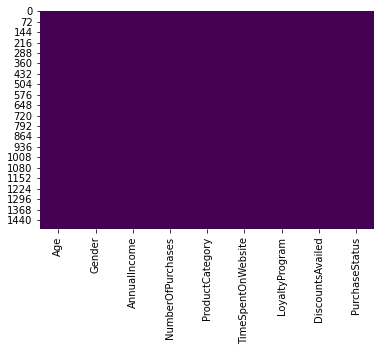

In [ ]:
print(data.isnull().sum())
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

# Checks for missing Values.

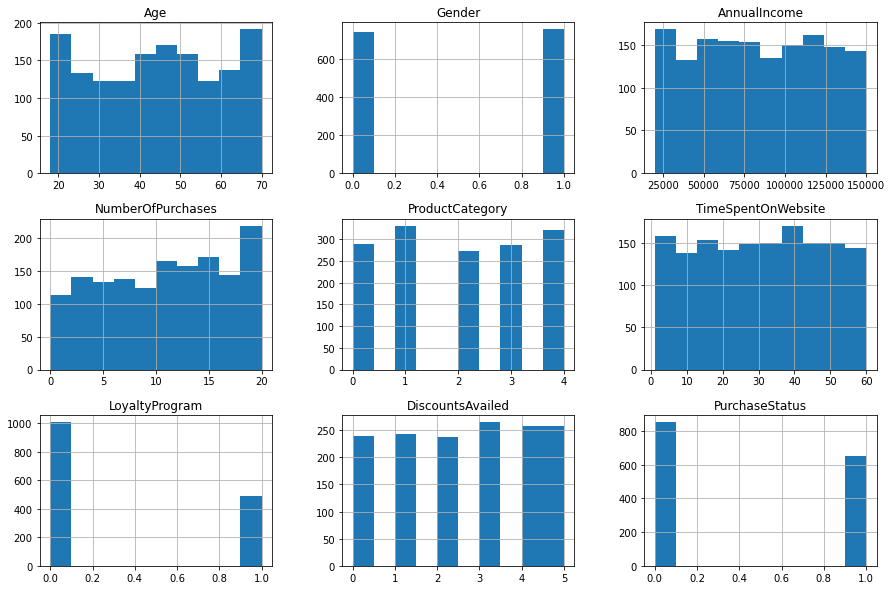

In [ ]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features].hist(figsize=(15,10))
plt.show()

# Shows analysis of numerical features.

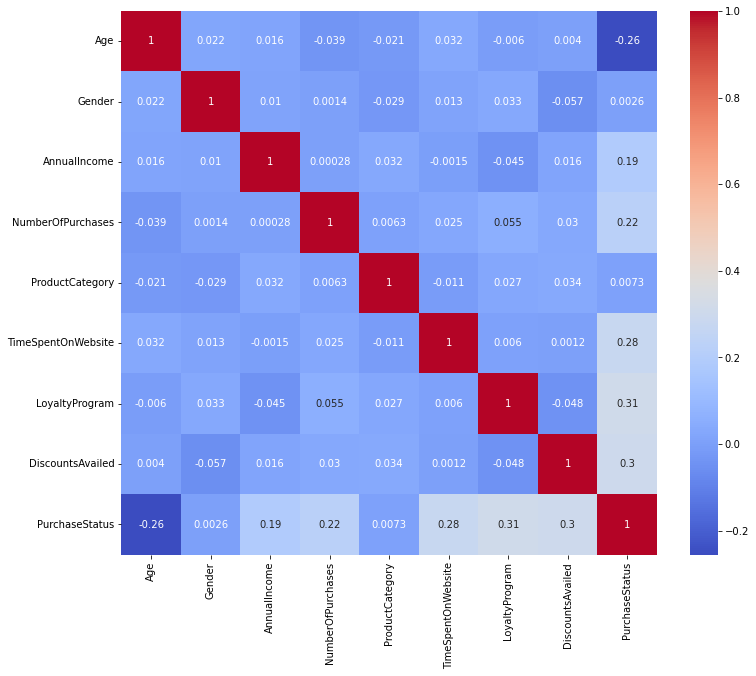

In [ ]:
plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Shows corelation between multiple parameters.

In [ ]:
# Identify categorical and numerical features
categorical_features = data.select_dtypes(include=['object', 'category']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Imputing with median for numerical features
for col in numerical_features:
    if data[col].isnull().sum() > 0:  # Check if the column has missing values
        data[col].fillna(data[col].median(), inplace=True)

# Imputing with mode for categorical features
for col in categorical_features:
    if data[col].isnull().sum() > 0:  # Check if the column has missing values
        data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
# Using One-Hot Encoding
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
X = data.drop(columns='PurchaseStatus')
y = data['PurchaseStatus']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# Initialize models
logistic_regression_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()

In [ ]:
# Train models
logistic_regression_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train, y_train)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Predict using test data
y_pred_logistic = logistic_regression_model.predict(X_test_scaled)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test_scaled)

In [ ]:
# Evaluate models
metrics = {
    "Logistic Regression": {
        "Precision": precision_score(y_test, y_pred_logistic),
        "Recall": recall_score(y_test, y_pred_logistic),
        "F1 Score": f1_score(y_test, y_pred_logistic),
        "Accuracy": accuracy_score(y_test, y_pred_logistic)
    },
    "Decision Tree": {
        "Precision": precision_score(y_test, y_pred_decision_tree),
        "Recall": recall_score(y_test, y_pred_decision_tree),
        "F1 Score": f1_score(y_test, y_pred_decision_tree),
        "Accuracy": accuracy_score(y_test, y_pred_decision_tree)
    },
    "KNN": {
        "Precision": precision_score(y_test, y_pred_knn),
        "Recall": recall_score(y_test, y_pred_knn),
        "F1 Score": f1_score(y_test, y_pred_knn),
        "Accuracy": accuracy_score(y_test, y_pred_knn)
    }
}

metrics


{'Logistic Regression': {'Precision': 0.8383233532934131,
  'Recall': 0.7253886010362695,
  'F1 Score': 0.7777777777777778,
  'Accuracy': 0.8222222222222222},
 'Decision Tree': {'Precision': 0.8578947368421053,
  'Recall': 0.844559585492228,
  'F1 Score': 0.8511749347258485,
  'Accuracy': 0.8733333333333333},
 'KNN': {'Precision': 0.8241758241758241,
  'Recall': 0.7772020725388601,
  'F1 Score': 0.8,
  'Accuracy': 0.8333333333333334}}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
logistic_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
logistic_grid = GridSearchCV(LogisticRegression(random_state=42), logistic_params, cv=5, scoring='f1')
logistic_grid.fit(X_train_scaled, y_train)

# Hyperparameter tuning for Decision Tree
decision_tree_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decision_tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), decision_tree_params, cv=5, scoring='f1')
decision_tree_grid.fit(X_train, y_train)

# Hyperparameter tuning for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='f1')
knn_grid.fit(X_train_scaled, y_train)

# Best parameters for each model
best_params_logistic = logistic_grid.best_params_
best_params_decision_tree = decision_tree_grid.best_params_
best_params_knn = knn_grid.best_params_

best_params_logistic, best_params_decision_tree, best_params_knn



({'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'},
 {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10},
 {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'})

In [ ]:
from sklearn.model_selection import GridSearchCV

logistic_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
logistic_grid = GridSearchCV(LogisticRegression(random_state=42), logistic_params, cv=5, scoring='f1')
logistic_grid.fit(X_train_scaled, y_train)
best_params_logistic = logistic_grid.best_params_


In [ ]:
decision_tree_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decision_tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), decision_tree_params, cv=5, scoring='f1')
decision_tree_grid.fit(X_train, y_train)
best_params_decision_tree = decision_tree_grid.best_params_


In [ ]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='f1')
knn_grid.fit(X_train_scaled, y_train)
best_params_knn = knn_grid.best_params_

In [ ]:
# Train the models with the best parameters
logistic_best = LogisticRegression(**best_params_logistic, random_state=42)
logistic_best.fit(X_train_scaled, y_train)
y_pred_logistic_best = logistic_best.predict(X_test_scaled)

decision_tree_best = DecisionTreeClassifier(**best_params_decision_tree, random_state=42)
decision_tree_best.fit(X_train, y_train)
y_pred_decision_tree_best = decision_tree_best.predict(X_test)

knn_best = KNeighborsClassifier(**best_params_knn)
knn_best.fit(X_train_scaled, y_train)
y_pred_knn_best = knn_best.predict(X_test_scaled)

# Evaluate the models again
metrics_best = {
    "Logistic Regression (Best)": {
        "Precision": precision_score(y_test, y_pred_logistic_best),
        "Recall": recall_score(y_test, y_pred_logistic_best),
        "F1 Score": f1_score(y_test, y_pred_logistic_best),
        "Accuracy": accuracy_score(y_test, y_pred_logistic_best)
    },
    "Decision Tree (Best)": {
        "Precision": precision_score(y_test, y_pred_decision_tree_best),
        "Recall": recall_score(y_test, y_pred_decision_tree_best),
        "F1 Score": f1_score(y_test, y_pred_decision_tree_best),
        "Accuracy": accuracy_score(y_test, y_pred_decision_tree_best)
    },
    "KNN (Best)": {
        "Precision": precision_score(y_test, y_pred_knn_best),
        "Recall": recall_score(y_test, y_pred_knn_best),
        "F1 Score": f1_score(y_test, y_pred_knn_best),
        "Accuracy": accuracy_score(y_test, y_pred_knn_best)
    }
}

metrics_best


{'Logistic Regression (Best)': {'Precision': 0.8545454545454545,
  'Recall': 0.7305699481865285,
  'F1 Score': 0.7877094972067039,
  'Accuracy': 0.8311111111111111},
 'Decision Tree (Best)': {'Precision': 0.9096045197740112,
  'Recall': 0.8341968911917098,
  'F1 Score': 0.8702702702702703,
  'Accuracy': 0.8933333333333333},
 'KNN (Best)': {'Precision': 0.8514285714285714,
  'Recall': 0.772020725388601,
  'F1 Score': 0.8097826086956521,
  'Accuracy': 0.8444444444444444}}